**bold text**# New Section

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/MatrixProject"

/content/drive/My Drive/Colab Notebooks/MatrixProject


In [3]:
df = pd.read_csv('data/shoes_prices.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(19387, 48)

In [0]:
df_usd = df[df.prices_currency =='USD'].copy()
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
df_usd_filter = df_usd [ df_usd['prices_amountmin'] < filter_max ]
df = df_usd_filter 

In [5]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [6]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

63.968341227870624

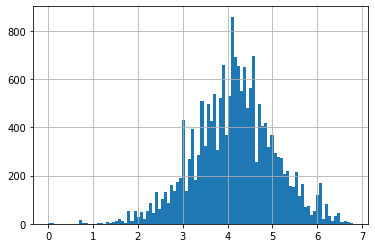

In [7]:
np.log(df['prices_amountmin']+ 1).hist(bins = 100)

In [8]:
median_price = np.median(df['prices_amountmin'])
median_price

y_pred = [median_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [9]:
price_log_mean = np.expm1(np.mean(np.log1p(y_true))) 

y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [10]:
df['brand_cat'] = df['brand'].factorize()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values
model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [12]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_cat'],
      dtype='object')

In [0]:

def run_model(feats):
 
  X = df[feats].values
  y = df['prices_amountmin'].values
  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)


In [14]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

run_model(['manufacturer_cat'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(-63.133649278023746, 3.394307434888982)

In [15]:
df['weight_cat'] = df['weight'].factorize()[0]

run_model(['weight_cat'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(-63.772166611222204, 3.629081601136923)

In [16]:
run_model(['brand_cat', 'manufacturer_cat', 'weight_cat'])

(-58.64679746843633, 4.442900883973497)

In [0]:
!git add day4.ipynb